In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('countries.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


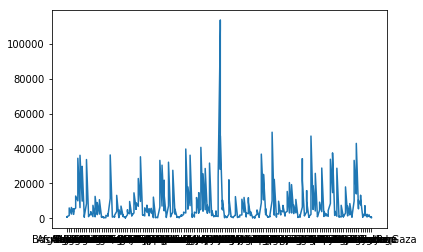

In [3]:
plt.plot(data.country, data.gdpPerCapita)

In [7]:
maxGDP = max(sorted(set(data.gdpPerCapita)))

In [8]:
country = data[data.gdpPerCapita == maxGDP]
country

,country,continent,year,lifeExpectancy,population,gdpPerCapita
853,Kuwait,Asia,1957,58.033,212846,113523.1329


In [10]:
mean_gdp_per_capita = data.groupby(['country']).mean().gdpPerCapita

In [15]:
top5 = mean_gdp_per_capita.sort_values(ascending=False).head()

In [20]:
kuwait = data[data.country == 'Kuwait']
kuwait.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
852,Kuwait,Asia,1952,55.565,160000,108382.35290
853,Kuwait,Asia,1957,58.033,212846,113523.13290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
856,Kuwait,Asia,1972,67.712,841934,109347.86700


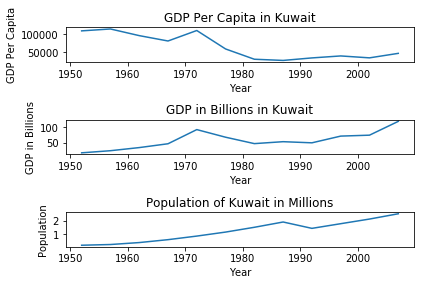

In [29]:
plt.subplot(311)
plt.title('GDP Per Capita in Kuwait')
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')

plt.subplot(312)
plt.title('GDP in Billions in Kuwait')
plt.plot(kuwait.year, kuwait.gdpPerCapita * kuwait.population / 10**9)
plt.xlabel('Year')
plt.ylabel('GDP in Billions')

plt.subplot(313)
plt.title('Population of Kuwait in Millions')
plt.plot(kuwait.year, kuwait.population / 10**6)
plt.xlabel('Year')
plt.ylabel('Population')

plt.tight_layout()
plt.show()
# plt.savefig('Richest Country', dpi=200)

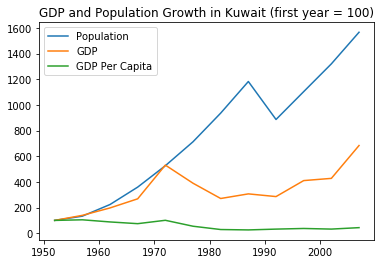

In [35]:
plt.plot(kuwait.year, kuwait.population / kuwait.population.iloc[0] * 100)
# this way first year population is set to 100 for comparison

kuwait_gdp = kuwait.population * kuwait.gdpPerCapita
plt.plot(kuwait.year, kuwait_gdp / kuwait_gdp.iloc[0] * 100)
plt.plot(kuwait.year, kuwait.gdpPerCapita / kuwait.gdpPerCapita.iloc[0] * 100)
plt.title('GDP and Population Growth in Kuwait (first year = 100)')
plt.legend(['Population', 'GDP', 'GDP Per Capita'])
plt.show()
# plt.savefig('GDP and Population Growth in Kuwait')

In [36]:
top5

country
Kuwait           65332.910472
Switzerland      27074.334405
Norway           26747.306554
United States    26261.151347
Canada           22410.746340
Name: gdpPerCapita, dtype: float64

In [37]:
us = data[data.country == 'United States']

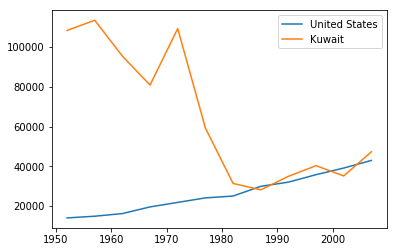

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(us.year, us.gdpPerCapita)
plt.plot(kuwait.year, kuwait.gdpPerCapita)
plt.legend(['United States', 'Kuwait'])
plt.show()
# plt.savefig('US vs Kuwait')